In [1]:
import os
import sys
path = os.path.dirname(os.path.abspath(""))+"/"
sys.path.append(path)
from CellAnalysis.evaluation import *
from CellAnalysis.visualize import SliceViewer
from skimage import io

3.3.0 module://ipykernel.pylab.backend_inline


In [2]:
file_root = path + 'x-ray-boxes/'

volume_JBW = io.imread(file_root + 'box6_vol.tif')
seg_JBW = io.imread(file_root + 'box6_seg.tif')
seg_JBW_stardist = io.imread(file_root + 'box6_stardist.tif')

volume_PT = io.imread(file_root + 'box2_vol.tif')
seg_PT = io.imread(file_root + 'box2_seg.tif')
seg_PT_stardist = io.imread(file_root + 'box2_stardist.tif')

volume_DL = io.imread(file_root + 'box4_vol.tif')
seg_DL = io.imread(file_root + 'box4_seg.tif')
seg_DL_stardist = io.imread(file_root + 'box4_stardist.tif')

In [3]:
centroid_thresh = 30
iou_thresh = 0.3
df_PT, df_PT_sd = find_segment_differences(seg_PT_stardist, seg_PT, centroid_thresh=centroid_thresh,
                                             iou_thresh=iou_thresh)
df_JBW, df_JBW_sd = find_segment_differences(seg_JBW_stardist, seg_JBW, centroid_thresh=centroid_thresh,
                                             iou_thresh=iou_thresh)
df_DL, df_DL_sd = find_segment_differences(seg_DL_stardist, seg_DL, centroid_thresh=centroid_thresh,
                                             iou_thresh=iou_thresh)

/Users/Paul/anaconda3/envs/py38/lib/python3.8/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/Users/Paul/anaconda3/envs/py38/lib/python3.8/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/Users/Paul/anaconda3/envs/py38/lib/python3.8/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_g

In [4]:
img1 = draw_boundaries(volume_JBW, seg_JBW, seg_JBW_stardist, draw_centroid=True)
img2 = draw_boundaries(volume_PT, seg_PT, seg_PT_stardist, draw_centroid=True)
img3 = draw_boundaries(volume_DL, seg_DL, seg_DL_stardist, draw_centroid=True)

_, _, merged_JBW = sync_instance_masks(seg_JBW, seg_JBW_stardist, df_JBW, df_JBW_sd)
_, _, merged_PT = sync_instance_masks(seg_PT, seg_PT_stardist, df_PT, df_PT_sd)
_, _, merged_DL = sync_instance_masks(seg_DL, seg_DL_stardist, df_DL, df_DL_sd)

In [5]:
%matplotlib notebook
import matplotlib.pyplot as plt
import pdb
import matplotlib
#matplotlib.pyplot.switch_backend('MacOSX')
print(matplotlib.__version__, matplotlib.get_backend())

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

class SliceViewer(object):
    def __init__(self, ax, X):
        self.ax = ax
        ax.set_title('use scroll wheel to navigate images')

        self.X = X
        self.mode = 1
        self.rows, self.cols, self.slices, _ = X.shape
        self.ind = self.slices // 2
        #self.index = (slice(None), slice(None), self.ind)

        #self.im = ax.imshow(self.X[self.index])
        self.im = ax.imshow(self.X[:, :, self.ind])
        self.update()

    def viewmode(self):
        mode = self.mode
        if mode == 1: # XY-plane
            self.rows, self.cols, self.slices, _ = X.shape
            self.index = (slice(None), slice(None), self.ind)
        elif mode == 2: # XZ-plane
            self.rows, self.slices, self.cols, _ = X.shape
            self.index = (slice(None), self.ind, slice(None))
        elif mode == 3: # YZ-plane
            self.slices, self.rows, self.cols, _ = X.shape
            self.index = (self.ind, slice(None), slice(None))
        else:
            raise KeyError('invalid view mode.')
        self.update()

    def onscroll(self, event):
        print("%s %s" % (event.button, event.step))
        if event.button == 'up':
            self.ind = (self.ind + 1) % self.slices
        else:
            self.ind = (self.ind - 1) % self.slices
        self.update()

    def click_view(self, event):
        pdb.set_trace()
        if event.button == '#':
            self.mode += 1
            self.viewmode()
        self.update()

    def update(self):
        #self.im.set_data(self.X[self.index])
        self.im.set_data(self.X[:, :, self.ind])
        self.ax.set_ylabel('slice %s' % self.ind)
        self.im.axes.figure.canvas.draw()

    def plot(volume1, volume2, volume3, volume4, volume5, volume6):
        fig, ax = plt.subplots(2, 3, figsize=(10,8))
        viewer1 = SliceViewer(ax[0, 0], volume1)
        viewer2 = SliceViewer(ax[0, 1], volume2)
        viewer3 = SliceViewer(ax[0, 2], volume3)
        viewer4 = SliceViewer(ax[1, 0], volume4)
        viewer5 = SliceViewer(ax[1, 1], volume5)
        viewer6 = SliceViewer(ax[1, 2], volume6)
        fig.canvas.mpl_connect('scroll_event', viewer1.onscroll)
        fig.canvas.mpl_connect('scroll_event', viewer2.onscroll)
        fig.canvas.mpl_connect('scroll_event', viewer3.onscroll)
        fig.canvas.mpl_connect('scroll_event', viewer4.onscroll)
        fig.canvas.mpl_connect('scroll_event', viewer5.onscroll)
        fig.canvas.mpl_connect('scroll_event', viewer6.onscroll)
        #fig.canvas.mpl_connect('click_# event', viewer.click_view)
        plt.show()

3.3.0 nbAgg


In [ ]:
figList,axList=[],[]
def plot(volume1, volume2, volume3, volume4, volume5, volume6):
    fig, ax = plt.subplots(2, 3, figsize=(10,8))
    figList.append(fig)
    axList.append(ax)
    viewer1 = SliceViewer(ax[0,0], volume1)
    viewer2 = SliceViewer(ax[0, 1], volume2)
    viewer3 = SliceViewer(ax[0, 2], volume3)
    viewer4 = SliceViewer(ax[1, 0], volume4)
    viewer5 = SliceViewer(ax[1, 1], volume5)
    viewer6 = SliceViewer(ax[1, 2], volume6)
    figList[-1].canvas.mpl_connect('scroll_event', viewer1.onscroll)
    figList[-1].canvas.mpl_connect('scroll_event', viewer2.onscroll)
    figList[-1].canvas.mpl_connect('scroll_event', viewer3.onscroll)
    figList[-1].canvas.mpl_connect('scroll_event', viewer4.onscroll)
    figList[-1].canvas.mpl_connect('scroll_event', viewer5.onscroll)
    figList[-1].canvas.mpl_connect('scroll_event', viewer6.onscroll)
    #fig.canvas.mpl_connect('click_# event', viewer.click_view)
    plt.show(figList[-1], block=False)

In [ ]:
plot(img1, img2, img3, merged_JBW, merged_PT, merged_DL)

<IPython.core.display.Javascript object>


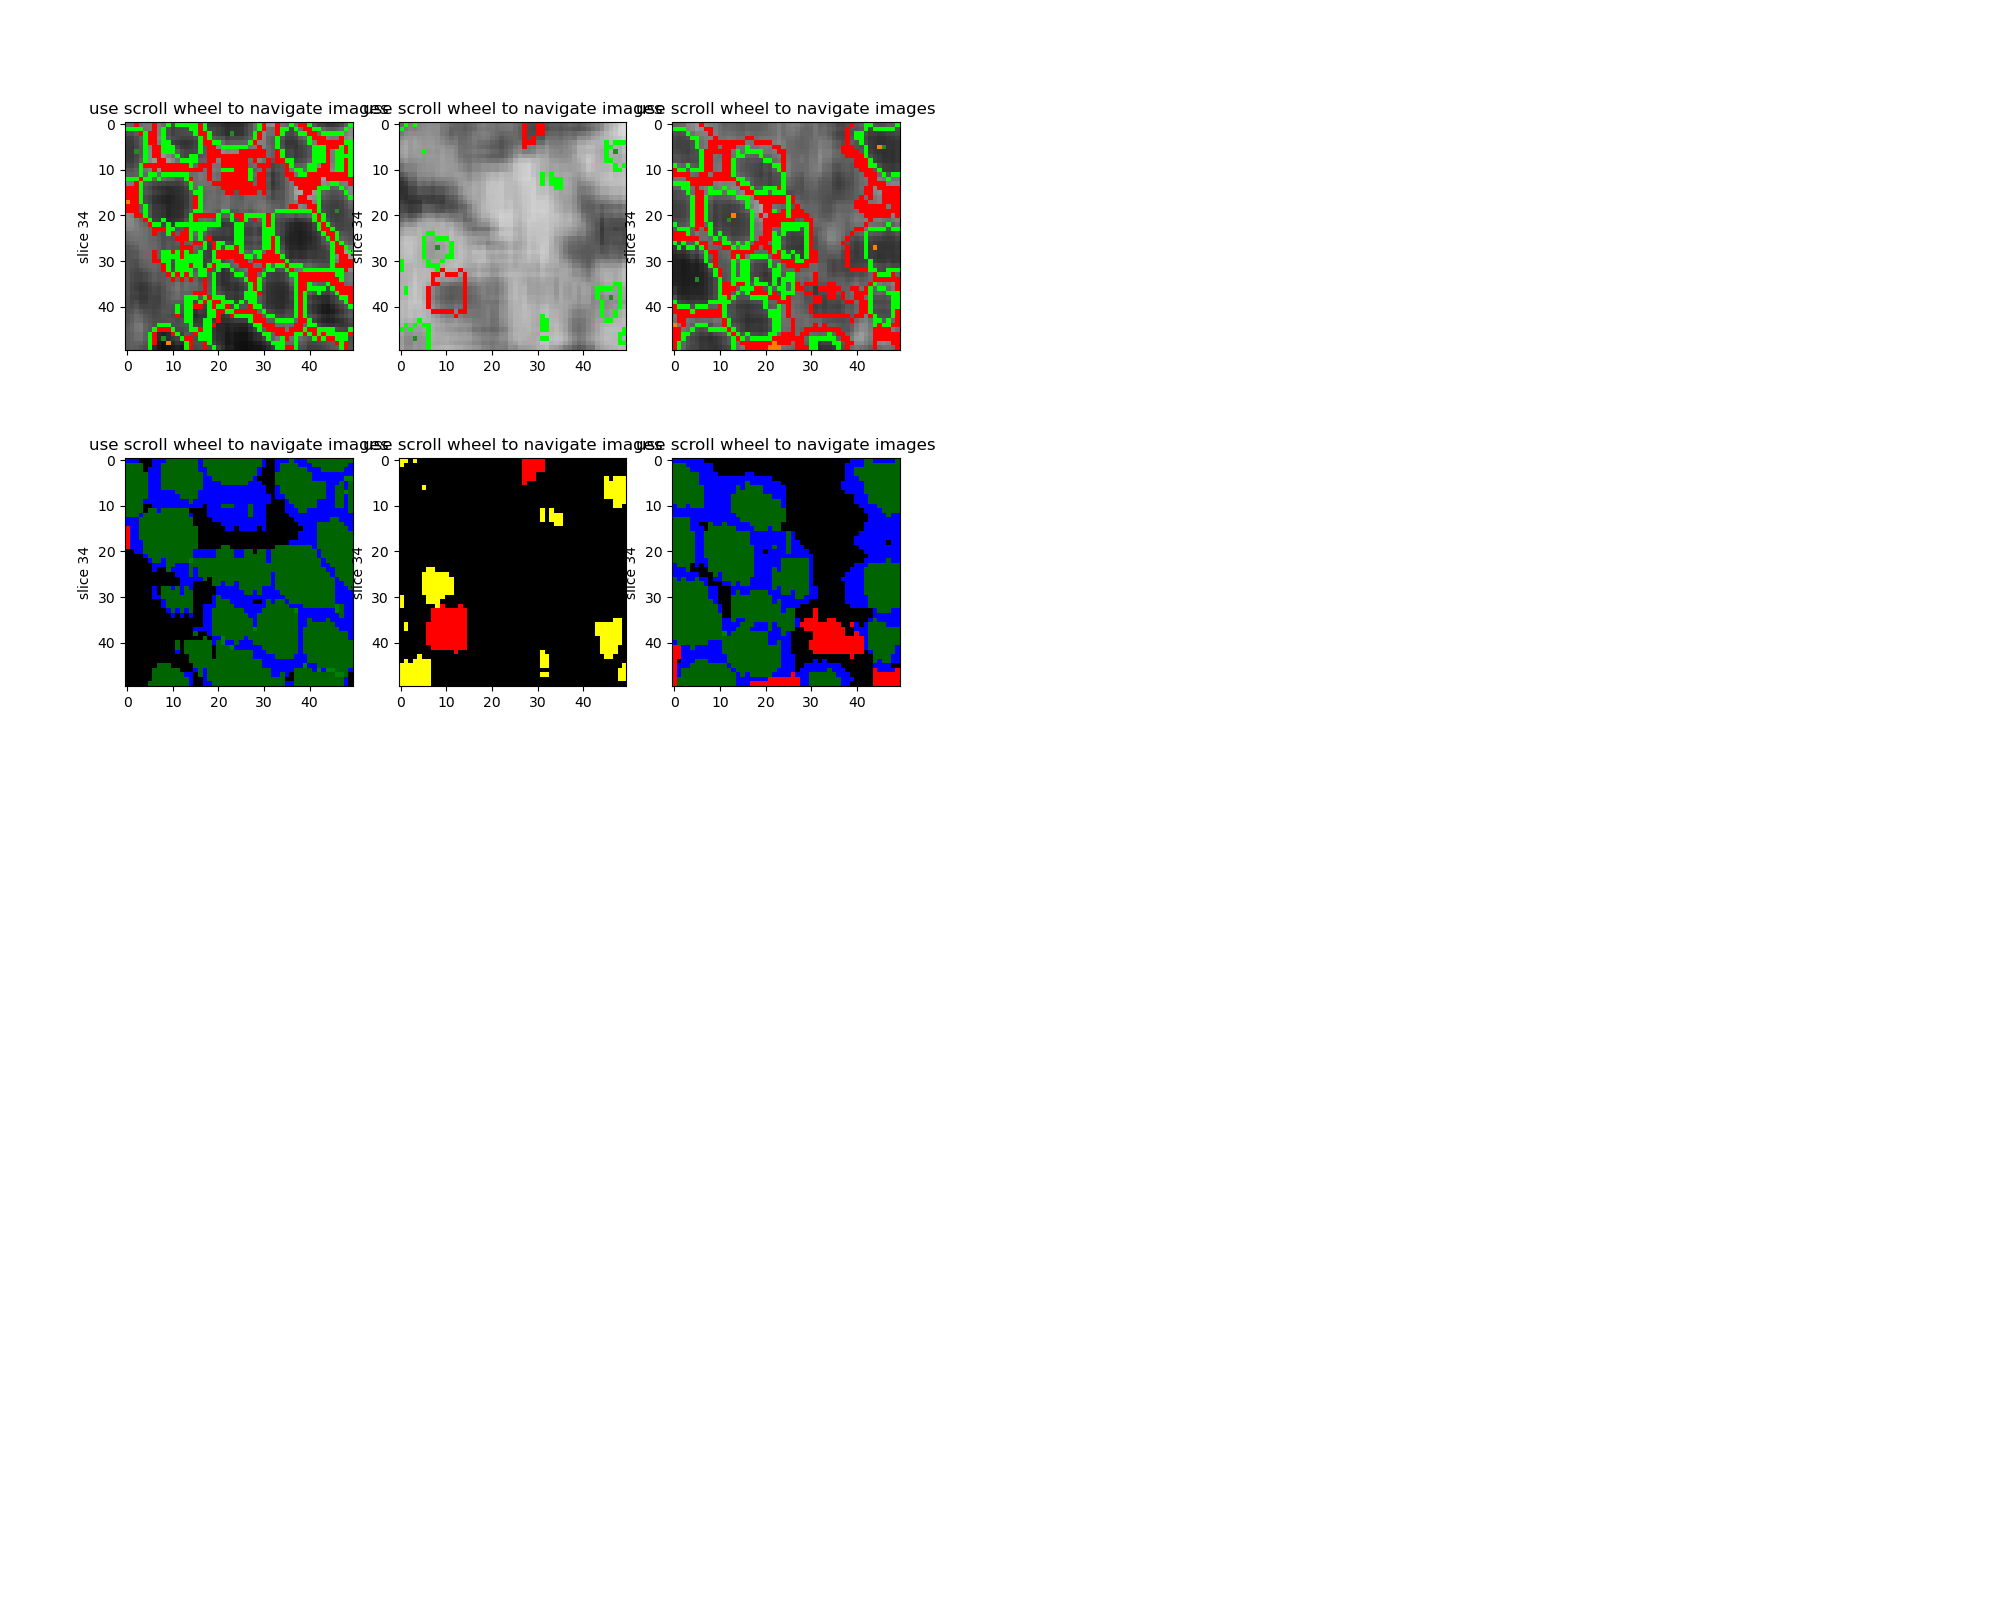

TypeError: show() got multiple values for argument 'block'

In [7]:
plot(img1, img2, img3, merged_JBW, merged_PT, merged_DL)